<a href="https://colab.research.google.com/github/affandhanbad-dev/Forest-Coverage-Classifier-webapp/blob/main/Forest_Cover_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow import keras

In [ ]:
dt = pd.read_csv('forest_cover.csv')

# EDA (Exploratory Data Analysis) & Data Preprocessing

In [ ]:
dt.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
dt.shape

(15120, 56)

In [ ]:
dt.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
dt.isnull().sum()

,0
Id,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [ ]:
dt.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
dt.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [ ]:
columns1 = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

In [ ]:
columns2 = ['Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4']

In [ ]:
columns3 = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10']


In [ ]:
columns4 = [ 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

In [ ]:
dt["Cover_Type"].value_counts()

,count
Cover_Type,
5,2160
2,2160
1,2160
7,2160
3,2160
6,2160
4,2160


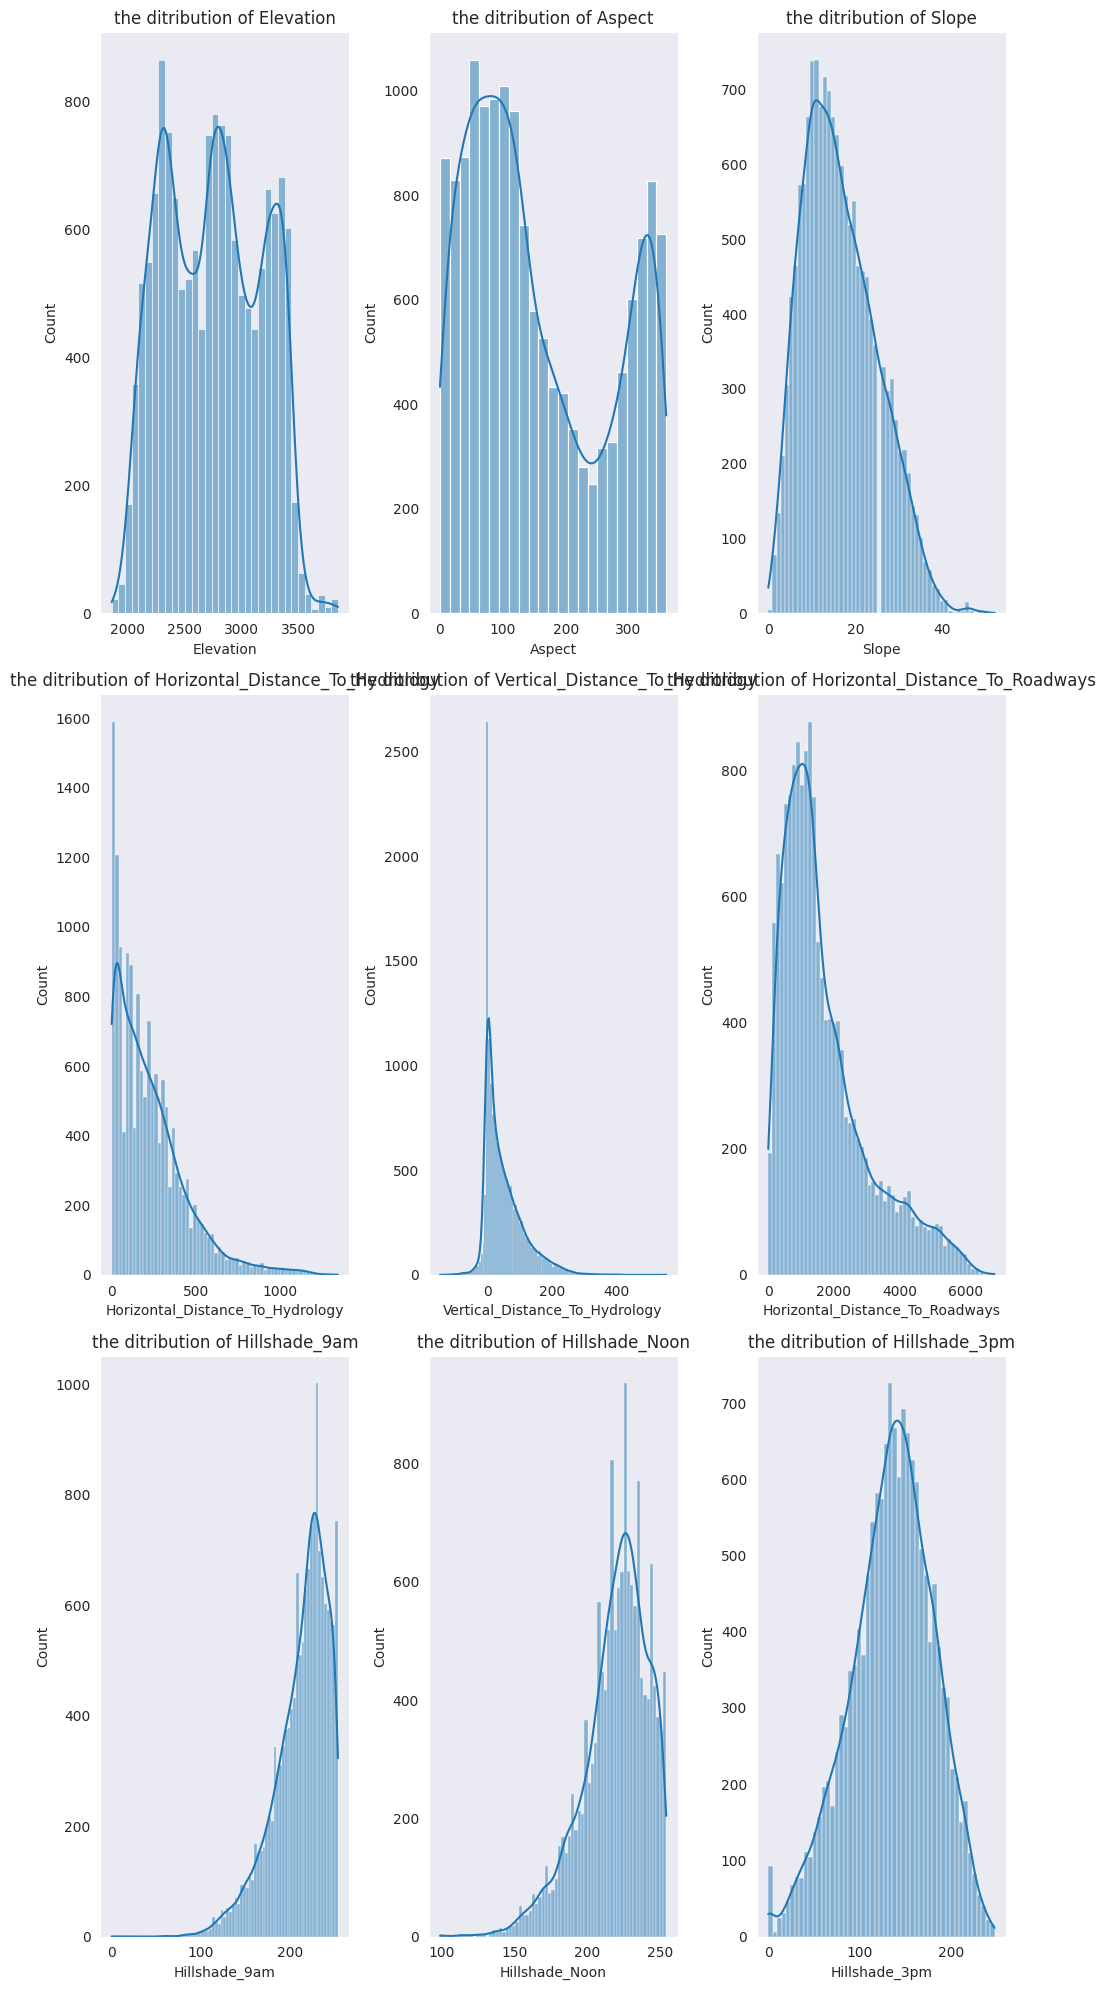

In [ ]:
sns.set_style('dark')
plt.figure(figsize=(10,20))
for i , col in enumerate (columns1,1):
  plt.subplot(3,3,i)
  sns.histplot(dt[col],kde = True)
  plt.title(f'the ditribution of {col}')
  plt.tight_layout()

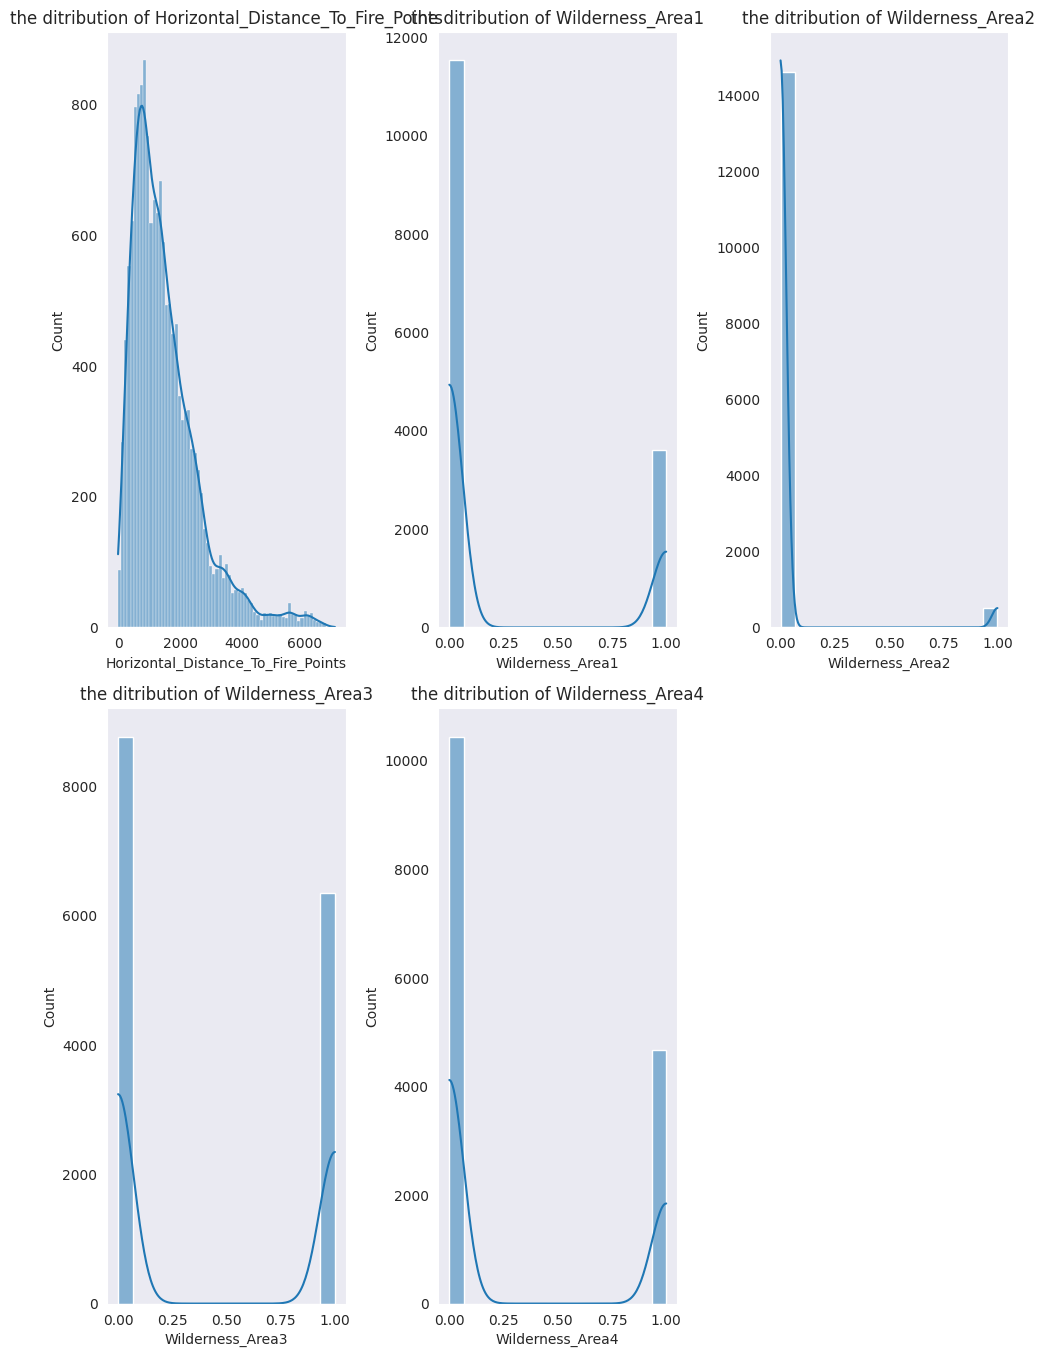

In [ ]:
sns.set_style('dark')
plt.figure(figsize=(10,20))
for i , col in enumerate (columns2,1):
  plt.subplot(3,3,i)
  sns.histplot(dt[col],kde = True)
  plt.title(f'the ditribution of {col}')
  plt.tight_layout()

In [ ]:
# sns.set_style('dark')
# plt.figure(figsize=(10,20))
# for i , col in enumerate (columns3,1):
#   plt.subplot(3,3,i)
#   sns.countplot(dt[col])
#   plt.title(f'the ditribution of {col}')
#   plt.tight_layout()

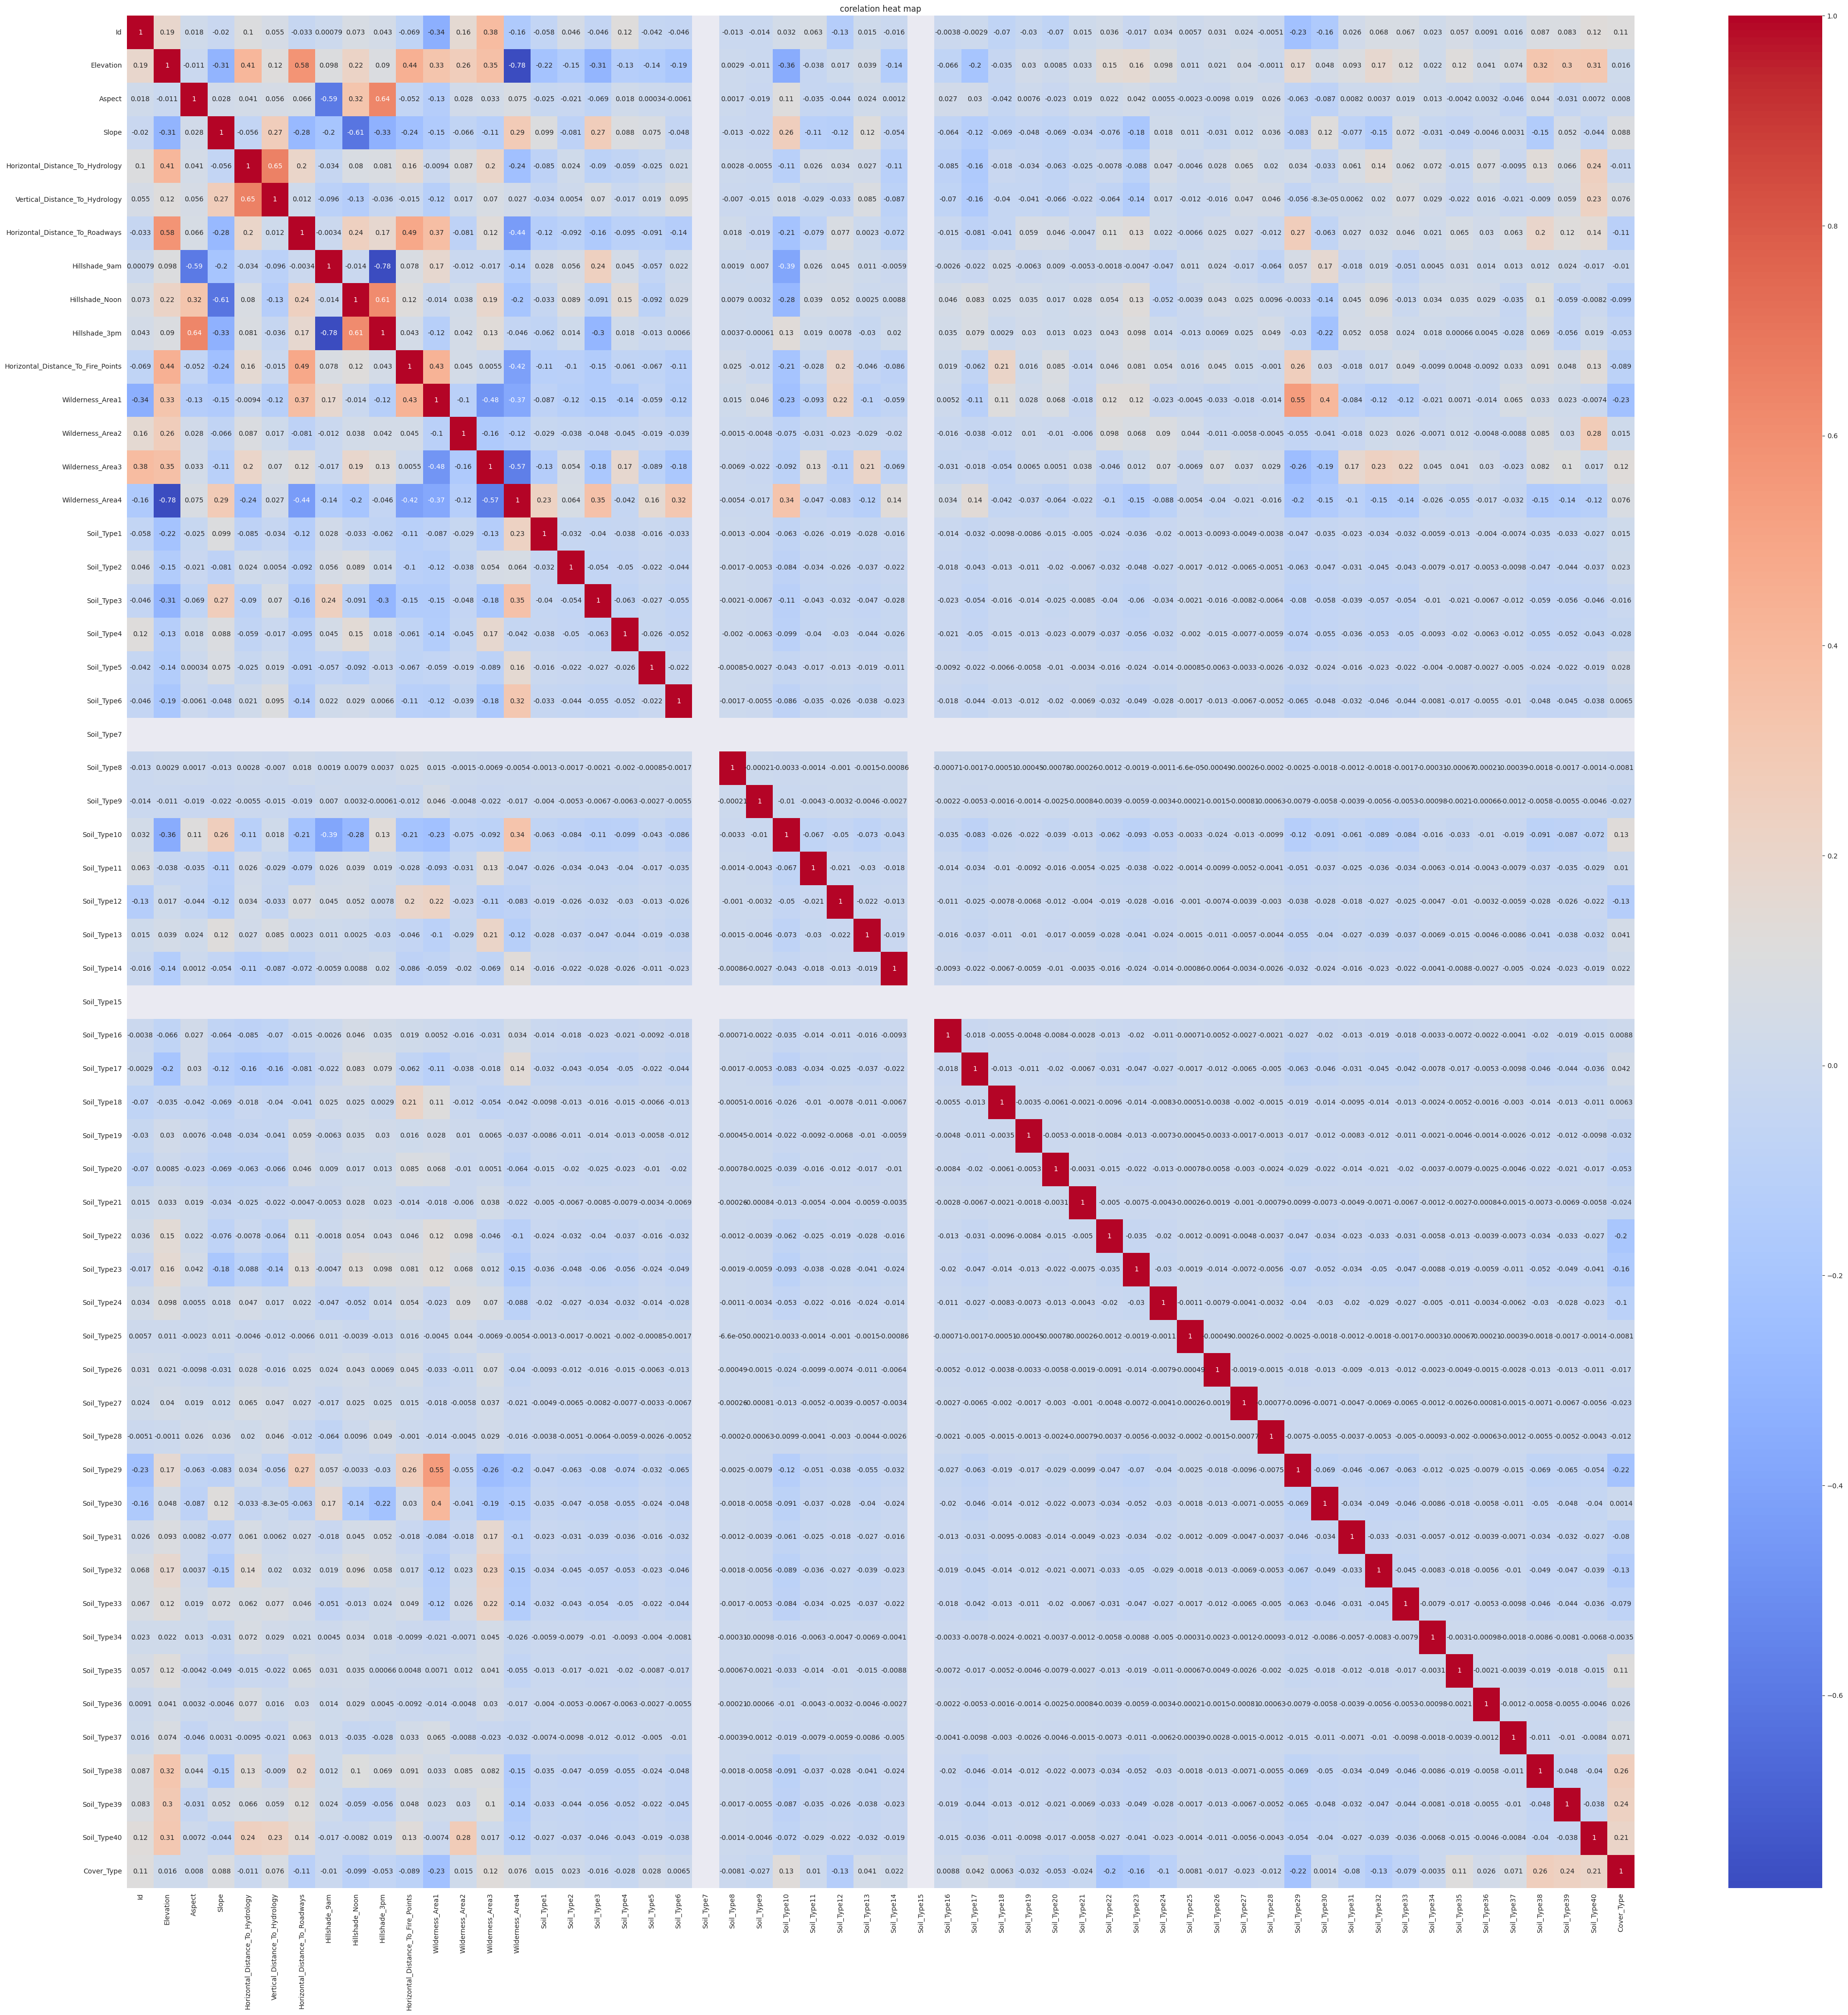

In [ ]:
plt.figure(figsize=(50,50))
sns.set_style('dark')
sns.heatmap(dt.corr(),annot=True,cmap='coolwarm')
plt.title("corelation heat map")
plt.show()

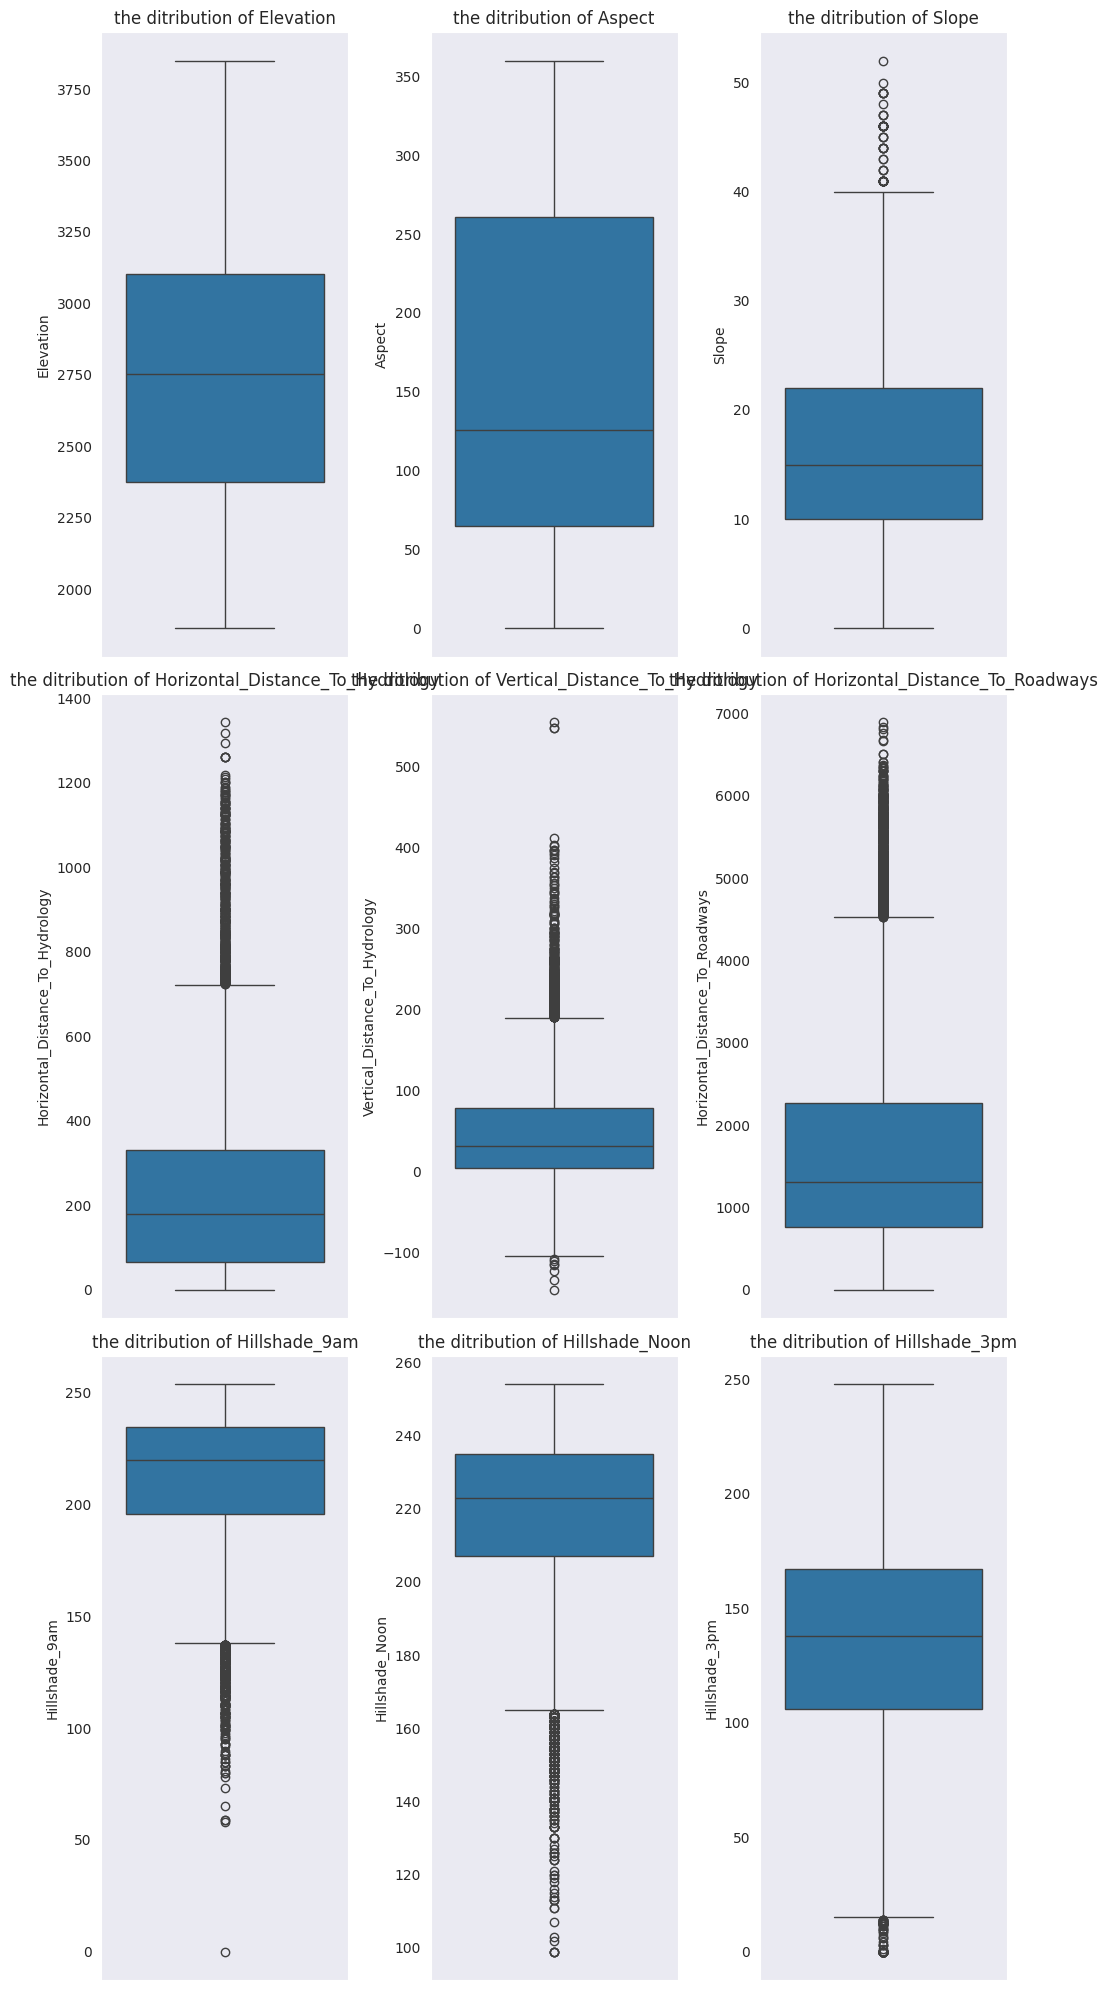

In [ ]:
sns.set_style('dark')
plt.figure(figsize=(10,20))
for i , col in enumerate (columns1,1):
  plt.subplot(3,3,i)
  sns.boxplot(dt[col])
  plt.title(f'the ditribution of {col}')
  plt.tight_layout()

In [ ]:
q1 = dt.quantile(0.25)
q3 = dt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = dt[(dt < lower_bound) | (dt > upper_bound)]
print(len(outliers))

15120


In [ ]:
q1 = dt['Hillshade_9am'].quantile(0.25)
q3 = dt['Hillshade_9am'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_Hillside_9am = dt[(dt["Hillshade_9am"] < lower_bound) | (dt['Hillshade_9am'] > upper_bound)]
print(len(outliers))

15120


In [ ]:
sorted(dt['Hillshade_9am'],reverse=True)[:25]

[254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254]

In [ ]:
q1 = dt['Hillshade_Noon'].quantile(0.25)
q3 = dt['Hillshade_Noon'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_Hillside_9am = dt[(dt["Hillshade_Noon"] < lower_bound) | (dt['Hillshade_Noon'] > upper_bound)]
print(len(outliers))

15120


In [ ]:
sorted(dt['Hillshade_Noon'],reverse=True)[:25]

[254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254,
 254]

In [ ]:
X = dt.drop('Cover_Type',axis=1)
Y = dt['Cover_Type']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_train = Y_train - 1
Y_test = Y_test - 1

# Models

In [ ]:
models = {
    'Decesion Tree' : DecisionTreeClassifier(random_state=42),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'XGBoost' : XGBClassifier(random_state=42),
}

In [ ]:
cv_score = {}
for name, model in models.items() :
  score = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
  print(f"{name} : {np.mean(score)}")
  cv_score[name]=score

Decesion Tree : 0.7748854967048059
Random Forest : 0.8591274995814813
XGBoost : 0.867642766118094


In [ ]:
cv_score

{'Decesion Tree': array([0.75991736, 0.79082265, 0.78503514, 0.76601902, 0.77263332]),
 'Random Forest': array([0.85289256, 0.86771393, 0.86027284, 0.85407193, 0.86068623]),
 'XGBoost': array([0.8607438 , 0.87308805, 0.87350145, 0.86109963, 0.8697809 ])}

In [ ]:
XGB = XGBClassifier(random_state=42)


In [ ]:
XGB_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}


In [ ]:
XGB_randomsearch = RandomizedSearchCV(XGB,XBG_param, n_iter=10,cv=5,scoring='accuracy', verbose=2, n_jobs=-1)

In [ ]:
XGB_randomsearch.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='accuracy', verbose=2)

In [ ]:
pred = XGB_randomsearch.predict(X_test)

In [ ]:
with open ('Forest_cover_model.sav','wb') as f:
  pickle.dump(XGB_randomsearch,f)

In [ ]:
accu = accuracy_score(Y_test, pred)
conf_matrix = confusion_matrix(Y_test, pred)
classification_report_str = classification_report(Y_test, pred)

In [ ]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.9001322751322751

Confusion Matrix:
 [[335  60   0   0   6   0  20]
 [ 67 321  12   0  28   7   3]
 [  0   1 376  13   6  32   0]
 [  0   0   6 439   0   4   0]
 [  0   7  10   0 397   2   0]
 [  0   4  12   9   0 407   0]
 [  4   1   0   0   0   0 435]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       421
           1       0.81      0.73      0.77       438
           2       0.90      0.88      0.89       428
           3       0.95      0.98      0.96       449
           4       0.91      0.95      0.93       416
           5       0.90      0.94      0.92       432
           6       0.95      0.99      0.97       440

    accuracy                           0.90      3024
   macro avg       0.89      0.90      0.89      3024
weighted avg       0.89      0.90      0.89      3024



In [ ]:
with open('Forest_cover_model.sav','rb') as f:
  model = pickle.load(f)

In [ ]:
print(dt.iloc[10])

Id                                      11
Elevation                             2612
Aspect                                 201
Slope                                    4
Horizontal_Distance_To_Hydrology       180
Vertical_Distance_To_Hydrology          51
Horizontal_Distance_To_Roadways        735
Hillshade_9am                          218
Hillshade_Noon                         243
Hillshade_3pm                          161
Horizontal_Distance_To_Fire_Points    6222
Wilderness_Area1                         1
Wilderness_Area2                         0
Wilderness_Area3                         0
Wilderness_Area4                         0
Soil_Type1                               0
Soil_Type2                               0
Soil_Type3                               0
Soil_Type4                               0
Soil_Type5                               0
Soil_Type6                               0
Soil_Type7                               0
Soil_Type8                               0
Soil_Type9 

In [ ]:
input = (3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
np_as_array = np.asarray(input)
input_reshaped = np_as_array.reshape(1,-1)
prediction = model.predict(input_reshaped)
print(prediction)
if (prediction[0]==0):
  print('Spruce/Fir')
elif (prediction[0]==1):
  print('Lodgepole Pine')
elif (prediction[0]==2):
  print('Ponderosa Pine')
elif (prediction[0]==3):
  print('Cottonwood/Willow')
elif (prediction[0]==4):
  print('Aspen')
elif (prediction[0]==5):
  print('Douglas-fir')
elif (prediction[0]==6):
  print('Krummholz')

[1]
Lodgepole Pine
